In [28]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
import matplotlib.pyplot as plt
from util import *
from loss import *
from Estimator import *

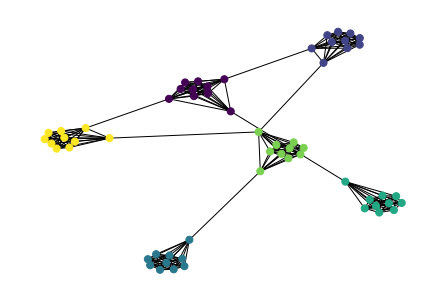

In [210]:
list_shapes = ['nx.complete_graph'] * 6
list_shapes_args = [[10]]*6 
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
L, D, Gamma = graph_to_mat(G)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=20, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()

/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


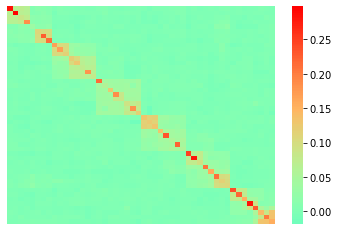

In [52]:
sele = symElastEstimator(l1=10, l2=10, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

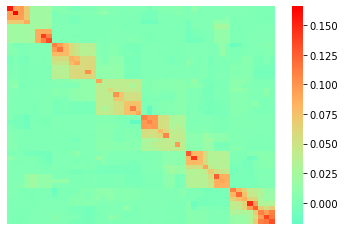

In [54]:
sele = symElastEstimator(l1=10, l2=100, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

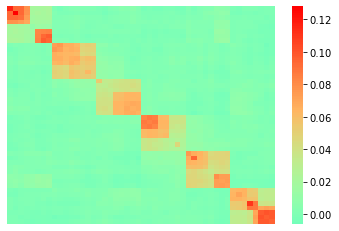

In [121]:
sele = symElastEstimator(l1=50, l2=200, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

In [122]:
W = sele.W.value
W_balanced = np.diag(1/np.sqrt(np.sum(W, axis=1))) @ W @ np.diag(1/np.sqrt(np.sum(W, axis=1))) 

In [135]:
np.sort(np.sum(W_balanced, axis=0))

array([0.64632064, 0.84507057, 0.87848273, 0.91404174, 0.92074473,
       0.93322277, 0.94499199, 0.94689007, 0.9618806 , 0.96575734,
       0.97271869, 0.97375418, 0.97586824, 0.97605124, 0.9769925 ,
       0.97714637, 0.97790491, 0.97825575, 0.97836925, 0.98746218,
       0.99143078, 0.99352317, 0.99406032, 0.99552996, 0.99627783,
       0.99712364, 1.00743348, 1.01149543, 1.01929009, 1.02337771,
       1.02354314, 1.02646277, 1.03166679, 1.03918516, 1.0393659 ,
       1.04078872, 1.04227933, 1.04474494, 1.04918478, 1.04921106,
       1.05551053, 1.05747592, 1.06839309, 1.07177078, 1.07389742,
       1.07604537, 1.07948187, 1.09634636])

<AxesSubplot:>

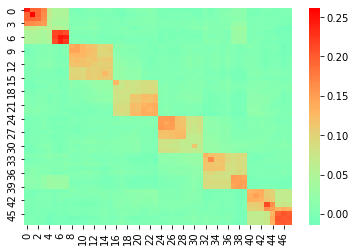

In [124]:
sb.heatmap(W_balanced, cmap='rainbow', center=0)

In [196]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans 

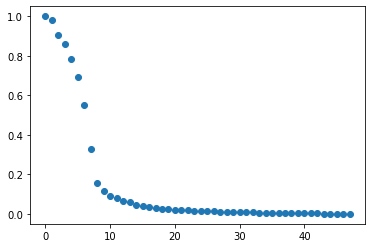

In [127]:
res = np.linalg.svd(W_balanced)
plt.scatter(range(len(res[1])), res[1])

In [206]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(([res[1]])).T)
kmeans.predict(np.array(([res[1]])).T)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

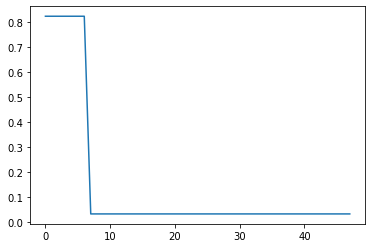

In [180]:
clf0 = DecisionTreeRegressor(max_leaf_nodes=2)
clf0.fit(X = np.array([range(len(res[1]))]).T, y=res[1])
plt.plot(clf0.predict(np.array([range(len(res[1]))]).T))

In [162]:
y=res[2][0]
X = np.array([range(len(y))]).T

In [182]:
clf1 = DecisionTreeRegressor(max_leaf_nodes=7)
clf1.fit(X=X, y=np.array(res[2][0]))
clf2 = DecisionTreeRegressor(max_leaf_nodes=7)
clf2.fit(X=X, y=np.array(res[2][1]))
clf3 = DecisionTreeRegressor(max_leaf_nodes=7)
clf3.fit(X=X, y=np.array(res[2][2]))
clf4 = DecisionTreeRegressor(max_leaf_nodes=7)
clf4.fit(X=X, y=np.array(res[2][3]))
clf5 = DecisionTreeRegressor(max_leaf_nodes=7)
clf5.fit(X=X, y=np.array(res[2][4]))
clf6 = DecisionTreeRegressor(max_leaf_nodes=7)
clf6.fit(X=X, y=np.array(res[2][5]))

DecisionTreeRegressor(max_leaf_nodes=7)

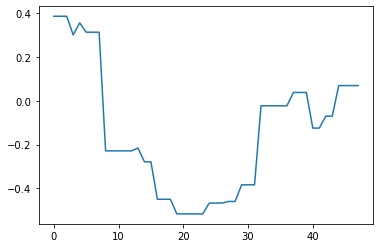

In [183]:
plt.plot(clf1.predict(X) + clf2.predict(X) + clf3.predict(X) + clf4.predict(X) + clf5.predict(X) )

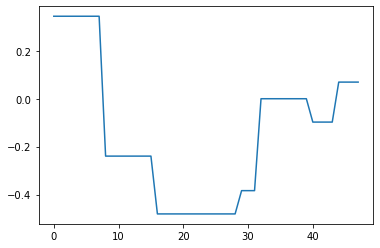

In [184]:
clf = DecisionTreeRegressor(max_leaf_nodes=7)
clf.fit(X=X, y=np.array(clf1.predict(X) + clf2.predict(X) + clf3.predict(X) + clf4.predict(X) + clf5.predict(X)))
plt.plot(clf.predict(X))

In [185]:
clf.predict(X)

array([ 3.44455213e-01,  3.44455213e-01,  3.44455213e-01,  3.44455213e-01,
        3.44455213e-01,  3.44455213e-01,  3.44455213e-01,  3.44455213e-01,
       -2.39594063e-01, -2.39594063e-01, -2.39594063e-01, -2.39594063e-01,
       -2.39594063e-01, -2.39594063e-01, -2.39594063e-01, -2.39594063e-01,
       -4.80971297e-01, -4.80971297e-01, -4.80971297e-01, -4.80971297e-01,
       -4.80971297e-01, -4.80971297e-01, -4.80971297e-01, -4.80971297e-01,
       -4.80971297e-01, -4.80971297e-01, -4.80971297e-01, -4.80971297e-01,
       -4.80971297e-01, -3.83783638e-01, -3.83783638e-01, -3.83783638e-01,
        1.98230036e-05,  1.98230036e-05,  1.98230036e-05,  1.98230036e-05,
        1.98230036e-05,  1.98230036e-05,  1.98230036e-05,  1.98230036e-05,
       -9.75111030e-02, -9.75111030e-02, -9.75111030e-02, -9.75111030e-02,
        6.94437193e-02,  6.94437193e-02,  6.94437193e-02,  6.94437193e-02])

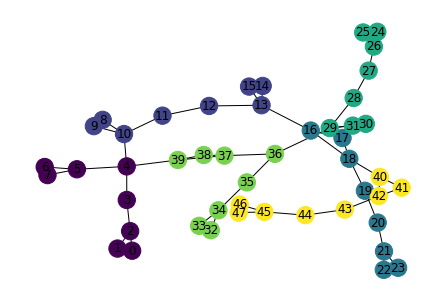

In [188]:
nx.draw(G, with_labels=True, node_color=group_label)

In [156]:
clf.predict(X)

array([ 0.34445521,  0.34445521,  0.34445521,  0.34445521,  0.34445521,
        0.34445521,  0.34445521,  0.34445521, -0.23625371, -0.23625371,
       -0.23625371, -0.23625371, -0.23625371, -0.23625371, -0.23625371,
       -0.23625371, -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 ,
       -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 ,
       -0.4904536 , -0.4904536 , -0.4904536 , -0.4904536 , -0.3342718 ,
       -0.3342718 , -0.3342718 , -0.06230959, -0.06230959, -0.06230959,
       -0.06230959, -0.06230959,  0.0757019 ,  0.0757019 ,  0.0757019 ,
       -0.06460311, -0.06460311, -0.06460311, -0.06460311,  0.04468883,
        0.04468883,  0.04468883,  0.04468883])

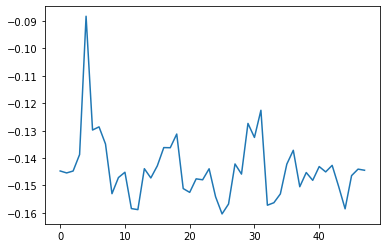

In [129]:
plt.plot(res[2][0])

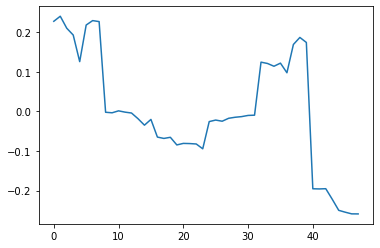

In [130]:
plt.plot(res[2][1])

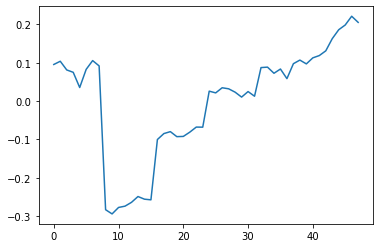

In [131]:
plt.plot(res[2][2])

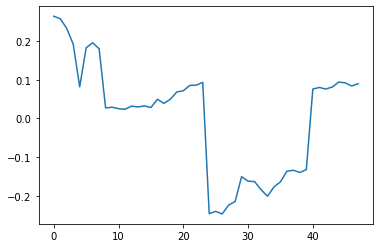

In [132]:
plt.plot(res[2][3])

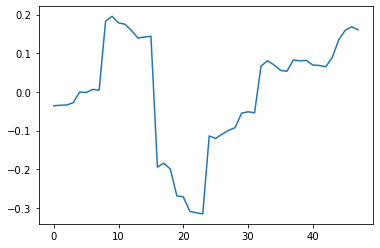

In [133]:
plt.plot(res[2][4])

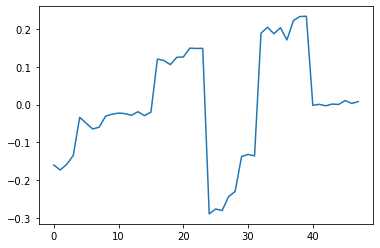

In [134]:
plt.plot(res[2][5])

In [221]:
node_features, group_mean, new_group_label = separated_feature_generator(group_label, num_separated=1, num_features=20, std=0.5, save=False, root=False) 

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


In [222]:
new_group_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6,
       6, 6, 6, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [212]:
new_group_label

array([6, 6, 6, 6, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5])

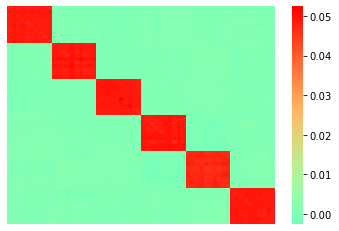

In [223]:
sele = symElastEstimator(l1=5, l2=10, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

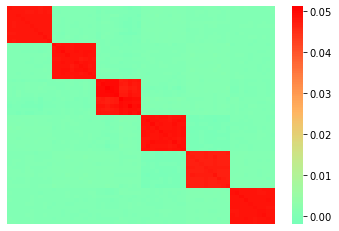

In [224]:
sele = symElastEstimator(l1=5, l2=5, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

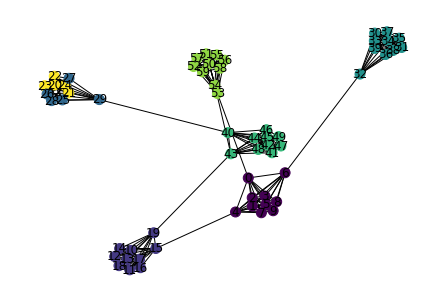

In [252]:
nx.draw(G, node_color=new_group_label, node_size=100, with_labels=True)

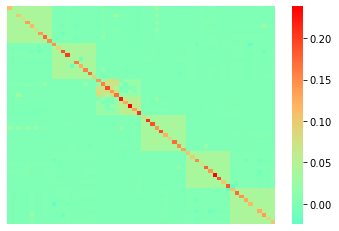

In [227]:
sele = symElastEstimator(l1=1, l2=2, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=False)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

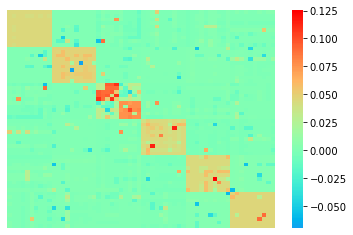

In [246]:
sele = symElastEstimator(l1=1, l2=0, l3=30, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

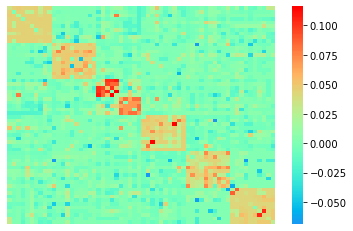

In [249]:
sele = symElastEstimator(l1=0.5, l2=2, l3=30, Gamma=Gamma, D=D, method='cp', solver='SCS', diag_pen=True)
sele.fit(node_features, maxiter=1000)
sele.heatplot(xticklabels=False, yticklabels=False, cbar=True)

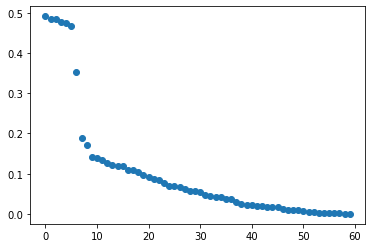

In [236]:
W = sele.W.value
res = np.linalg.svd(W)
plt.scatter(range(len(res[1])), res[1])

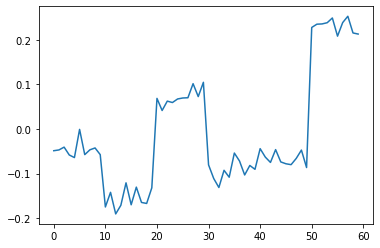

In [238]:
plt.plot(res[2][1])

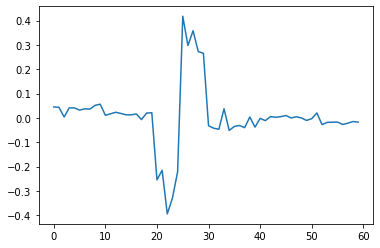

In [243]:
plt.plot(res[2][6])